# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [9]:
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace

#1 Units and separators (1,000) are removed using the replace method. Then, coercion is used to coerce a number to numeric
airbnb = pd.read_csv('./data/airbnb_hw.csv',low_memory=False)
airbnb['Price'].str.replace(r'[\$,]', '',)
print('Before coercion: \n', airbnb['Price'].describe(),'\n') # The age variable is not read by Pandas as a number
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce') # Coerce the variable to numeric
# Create a missing dummy:
airbnb['Price_nan'] = airbnb['Price'].isnull() # Equals 1 if missing, 0 if non-null
# After coercion:
print('After coercion: \n', airbnb['Price'].describe(),'\n') # Describe the numeric variable
print('Total Missings: \n', sum(airbnb['Price_nan']),'\n') # How many missing values are there?

#2
police = pd.read_csv('./data/mn_police_use_of_force.csv',low_memory=False)
# Create a missing dummy:
police['subject_injury_nan'] = police['subject_injury'].isnull() # Equals 1 if missing, 0 if non-null
# Calculate the proportion of missing (NaN) values to non-missing (non-null) values
missing_count = police['subject_injury_nan'].sum()  # Count of missing (NaN)
non_missing_count = police['subject_injury_nan'].count() - missing_count  # Count of non-missing (non-null)
proportion_missing = missing_count / non_missing_count
print('Proportion of missing (NaN) values to non-missing values',proportion_missing)
# This proportion is very high and could make it difficult to analyze the data 
# Assume missing values mean no injury, replace NaNs with 'No'
police['subject_injury'] = police['subject_injury'].fillna('No')


# Cross-tabulate the cleaned 'subject_injury' and 'force_type' columns
cross_tab = pd.crosstab(police['subject_injury'], police['force_type'])
print(cross_tab)
#firearm, less lethal, and maximal restraint technique are all applicable to NAs in the data


#3
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you
df_ct = pd.get_dummies(df['WhetherDefendantWasReleasedPretrial'])
print(df_ct)
# find that 9 is a category
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace(['',9],np.nan)
#replace missing entries and 9's with np.nan

#4




Before coercion: 
 count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 

       10.0   20.0   21.0   22.0   24.0   25.0   26.0   27.0   28.0   29.0   \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False   True  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
30473  False  False  False  False  False  False  False  False  False  False   
30474  False  False  False  False  False  False  False  False  False  False   
30475  False  False  False  False  False  False  False  False  False  False   
30476  False  False  False  False  False  False  False  False  False  False   
30477  False  False

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Proportion of Male Attacks 0.8027181688125894
Unprovoked Shark Attacks: 0.7369098712446351
Sex          M  .    F     M  M   M x 2  N  lli
Type                                           
Provoked     0  0   31   546   0      0  1    0
Unknown      0  1   91   756   0      1  1    0
Unprovoked   1  0  670  4309   2      0  0    1
Fatal Y/N      N  Unknown     Y
Type                           
Provoked     605       12    20
Unknown      450      555   197
Unprovoked  3815       85  1251
Fatal Y/N     N  Unknown     Y
Sex                           
 M            1        0     0
.             0        0     1
F           601       71   120
M          3905      467  1239
M             2        0     0
M x 2         0        1     0
N             1        0     1
lli           1        0     0
Percent of White Sharks 0.1933644375324002


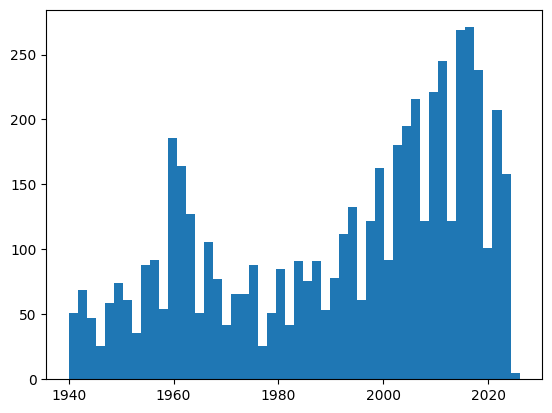

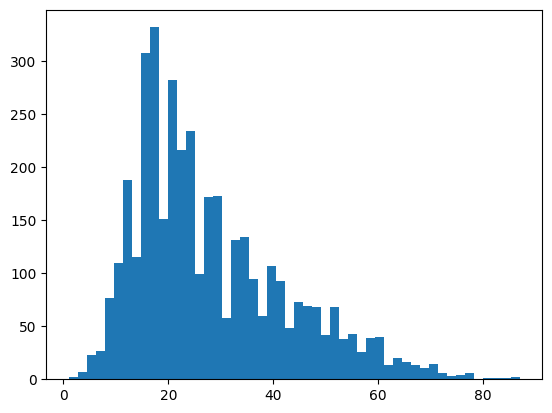

In [1]:
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace

#1
shark = pd.read_excel('../data/GSAF5.xls')

#2
shark.dropna(axis=1, how='all', inplace=True)

#3
# Convert 'Year' to numeric (forcing errors to NaN)
shark['Year'] = pd.to_numeric(shark['Year'], errors='coerce')
# Replace 0000 with NaN (since it's invalid)
shark.loc[shark['Year'] == 0, 'Year'] = None

year_range = shark['Year'].describe()
shark_recent = shark[shark['Year'] >= 1940]
plt.figure()
plt.hist(shark_recent['Year'], bins=50)
#the shark attacks are increasing over time

#4
# Convert 'Age' to numeric, forcing errors to Na
shark['Age'] = pd.to_numeric(shark['Age'], errors='coerce')
# Replace 0000 with NaN (since it's invalid)
shark.loc[shark['Year'] == 0, 'Year'] = None
# Drop rows where age is Na
shark.dropna(subset=['Age'])
# Plot histogram of ages
plt.figure()
plt.hist(shark['Age'], bins=50)

#5
male = (shark['Sex'] == 'M').mean()
print("Proportion of Male Attacks",male)

#6
shark.loc[~((shark['Type'] == 'Provoked') | (shark['Type'] == 'Unprovoked')), 'Type'] = "Unknown"
print("Unprovoked Shark Attacks:",(shark['Type'] == 'Unprovoked').mean())

#7
shark.loc[~((shark['Fatal Y/N'] == 'Y') | (shark['Fatal Y/N'] == 'N')), 'Fatal Y/N'] = "Unknown"

#8
# Unprovoked men v women
cross_tab1 = pd.crosstab(shark['Type'], shark['Sex'])
print(cross_tab1)
# Unprovoked attacks on men more likely

#Fatal vs Type
cross_tab2 = pd.crosstab(shark['Type'], shark['Fatal Y/N'])
print(cross_tab2)
#Unprovoked more fatal

#Fatal vs Sex
cross_tab3 = pd.crosstab(shark['Sex'], shark['Fatal Y/N'])
print(cross_tab3)
#More fatal male attacks

#9
white_sharks = (shark['Species '].str.contains('White', case=False)).mean()

print("Percent of White Sharks", white_sharks)

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

1. The most recent US gathered data through self-reporting or self-identification. The questions ask if the person is of hispanic, latino or spanish origin. Then, the races include white, black, american indian or alaskan native, and multiple boxes for multiple asian countries. Then, it allows for other asian and other races to be inputted. The racial boxes also allow for specification of origin. 

2. We gather the data to understand the changes of the demographic of the population. It can help make correlations and conclusions about society. Particular racial groups may shape the culture and vibe of a location. Policies and laws can be made in accordance to demographic concentrations to target their needs. Data quality is important because if the data is not reliable or accurate, it cannot be trusted. Conclusions and generalizations cannot be made, and other research and scientific data cannot be based off this information. 

3. Something that was done well in the consensus is having a separate hispanic category, acknowledging that there may be black, white, indigenous, etc. hispanic people. Multiple selection is also helpful. Something that is missing are some minimum categories. In the 2024 statistical policy directive, middle eastern or northern african was added as a new minimum category. This is a step to the right direction, but future large scale surveys could add more specific categories. Some of the Census' good practices such as allowing to print origins could be adopted more widely to gather richer data. There may be nuanced ways of self-identification that people may not be aware of. 

4. The Census gathered data on sex and gender by asking for male or female. As intersex, transgender, and genderqueer people exist, these two options may be limiting. Another option "other" may be useful to have. This could also be more richer by suggesting categories such as intersex and transgender male to female. 

5. When it comes to cleaning protected data, it is important to maintain data privacy because the information can be identifying. When there are missing values, it could lead to assumptions about particular aspects. For example, if someone identified as hispanic but did not fill in other races, people might assume their race based off preconceived notions. Missing values may lead to filling in to a "default" choice due to what people believe is generally true. 

6. An algorithm that imputes values for protected characteristics could compromise the safety of the individual. If others find out about these characteristics, it could affect the individual's life at work or school. There may be prejudices within society that may negatively affect people. 
